work8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

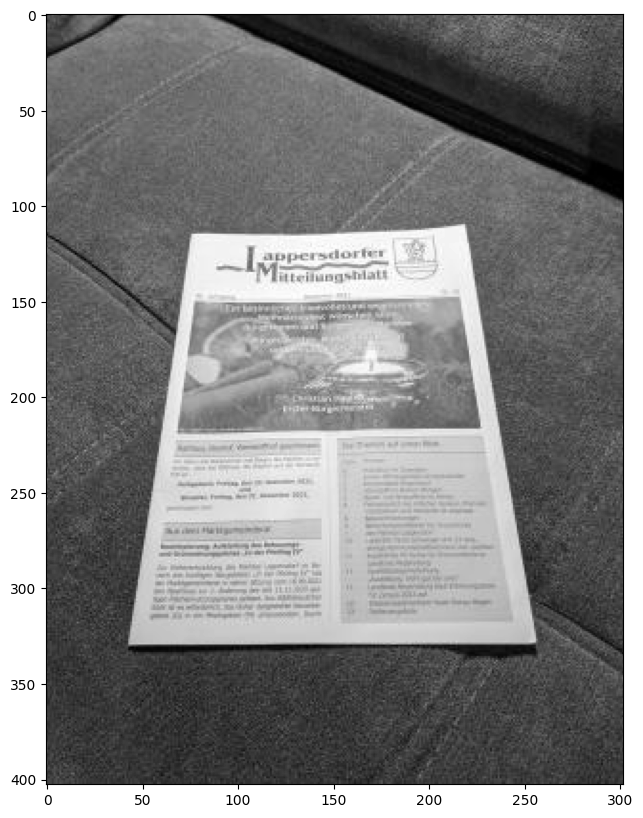

In [2]:
img = cv2.imread('../data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

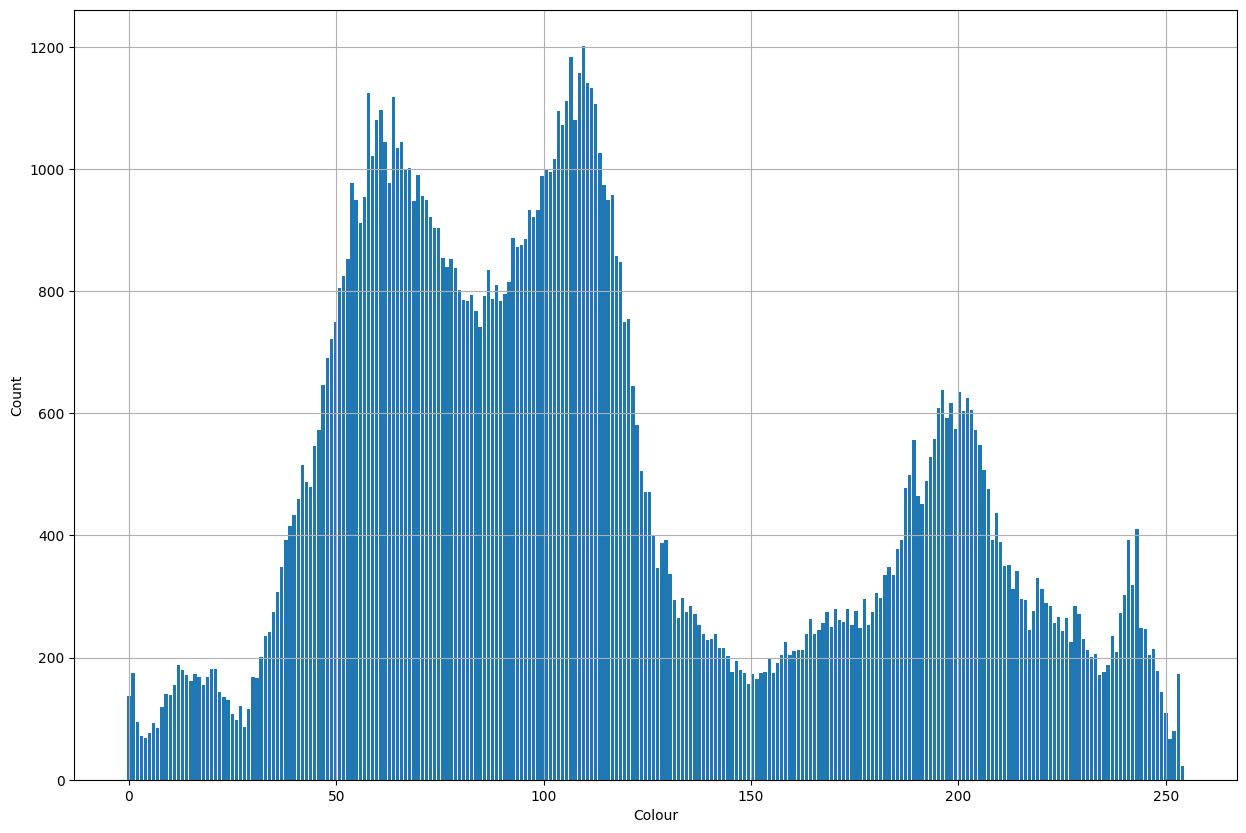

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [4]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = img[img >= th]
    # Extract the image pixels corresponding to the background
    background = img[img < th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 140


(<Axes: >, <matplotlib.image.AxesImage at 0x1b997071e80>)

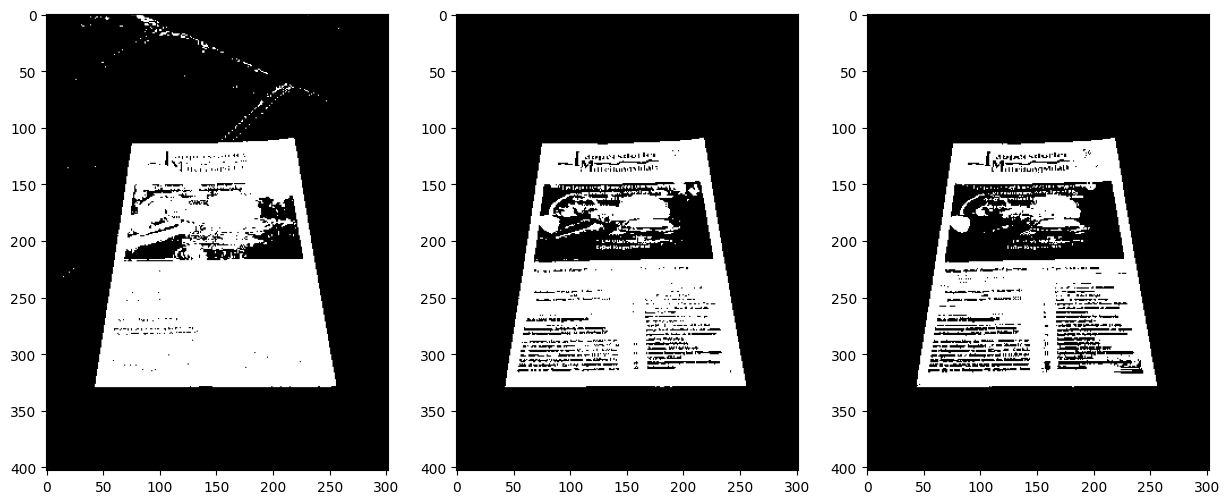

In [18]:
plt.subplot(131), plt.imshow(img > opt_th, cmap='gray')
plt.subplot(132), plt.imshow(img > 170, cmap='gray')
plt.subplot(133), plt.imshow(img > 180, cmap='gray')

Looking at the computed histogram, could it be considered bimodal?

    Скорее 3-modal  и Оцу 1 моду выделил, тогда как текст - 2я
    
Looking at the computed histogram, what binarization threshold would you chose? Why? 

    На 170 выглядит лучше

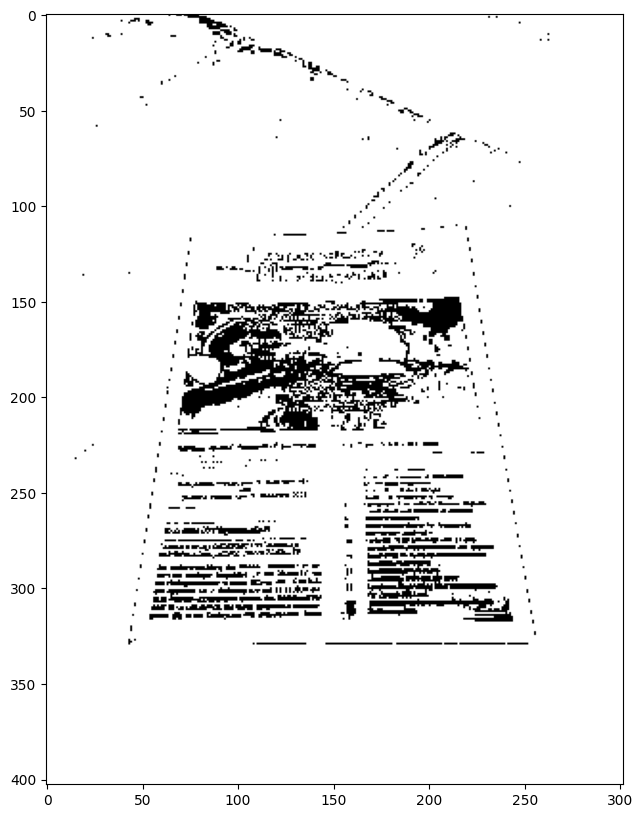

In [24]:
#plt.subplot(122), plt.imshow(img < 70 or img > 170, cmap='gray')
binary_img1 = ((img < 140) | (img > 180)).astype(np.uint8) * 255
plt.imshow(binary_img1, cmap='gray')

Looking at the resulting (thresholded) image, is the text binarization (detection) good?

    Нет, очевидно, усреднение по всему изображению усредняет и буквы и фон.
Оставлю здесь что бы не потерять:

    Адаптивное пороговое преобразование
    Метод Ниблэка
    Комбинирование методов
    Предобработка изображения